In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import subprocess
import json

project_dir = '/curr/kdmarrett/accelerate/'
bin_dir = project_dir + 'bin/'
data_dir = project_dir + 'data/'
save_fig = True
show_fig = True


from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [2]:
radius_json = data_dir + 'test_radius.json'

In [ ]:
# run the radius script from scratch
test_cmd = bin_dir + './recut_test --gtest_filter=Radius.* --gtest_output=json:' + radius_json
tlog = 'test.log'
subprocess.run(['touch', tlog])
with open(tlog) as out:
    subprocess.run(test_cmd.split(), stdout=out)

In [3]:
# load
df = pd.read_json(radius_json)

In [4]:
test= df['testsuites'][0]['testsuite'][0]
recut_keys = [i for i in test.keys() if 'Recut' in i]
xy_keys = [i for i in test.keys() if 'XY' in i]

In [5]:
recut_errors = [test[i] for i in recut_keys]
xy_errors = [test[i] for i in xy_keys]
grid_sizes_recut = [int(key.split()[3]) for key in recut_keys]
grid_sizes_xy = [int(key.split()[3]) for key in xy_keys]

recut_errors = [x for _,x in sorted(zip(grid_sizes_recut,recut_errors))]
xy_errors = [x for _,x in sorted(zip(grid_sizes_xy, xy_errors))]
grid_sizes = sorted(grid_sizes_recut)
assert(grid_sizes == sorted(grid_sizes_xy))
radius_sizes = [i/4 for i in grid_sizes]

/curr/kdmarrett/accelerate/data/Calculate_Radius_and_Prune_Accuracy.png


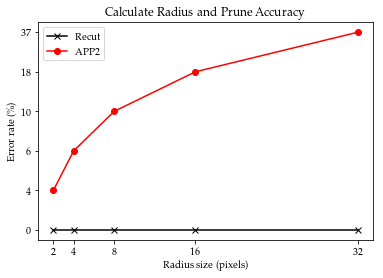

In [10]:
plt.plot(radius_sizes, recut_errors, 'k-x', label=r'Recut')
plt.plot(radius_sizes, xy_errors, 'r-o', label=r'APP2')
plt.xlabel(r'Radius size (pixels)')
plt.xticks(radius_sizes)
plt.ylabel(r'Error rate (\%)')
plt.legend()
title = r'Calculate Radius and Prune Accuracy'
plt.title(title)
fig_output_path = '%s%s.png' % (data_dir, title.replace(' ', '_'))
if save_fig:
    plt.savefig(fig_output_path)
    print(fig_output_path)

In [12]:
bench_json = data_dir + 'bench_radius.json'

In [13]:
data = json.load(open(bench_json))
df = data['benchmarks']
# only collect it once, the benchmark data is inherently ordered
grid_sizes = [int(i['name'].split('/')[-1]) for i in df if 'recut' in i['name']]
names = ['recut', 'xy', 'accurate' ]
real_times = []
time_unit = df[0]['time_unit']
for name in names:
    real_times.append( [float(i['real_time']) for i in df if name in i['name']])
radius_sizes = [i/4 for i in grid_sizes]
real_times

[[0.46603495082826096,
  2.936244206581296,
  16.95476512651186,
  125.00730790197849,
  972.874591127038],
 [0.05144590590442778,
  0.42763615196869187,
  9.40768551081419,
  253.3106841146946,
  11256.099244579673],
 [0.08382119083919747,
  1.0651246666215186,
  25.398140773177147,
  913.9463733881712,
  43663.533098995686]]

/curr/kdmarrett/accelerate/data/Calculate_Radius_Performance.png


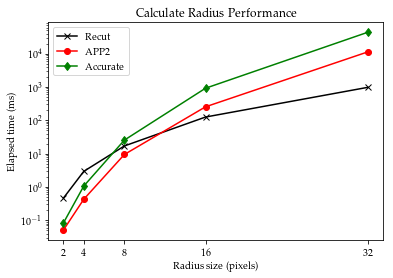

In [15]:
plt.plot(radius_sizes, real_times[0], 'k-x', label=r'Recut')
plt.plot(radius_sizes, real_times[1], 'r-o', label=r'APP2')
plt.plot(radius_sizes, real_times[2], 'g-d', label=r'Accurate')
#plt.plot(radius_sizes, real_times[2], 'k-', label=r'$O(r)')
plt.xlabel(r'Radius size (pixels)')
plt.xticks(radius_sizes)
plt.ylabel(r'Elapsed time (%s)' % time_unit)
plt.legend()
plt.yscale('log', basey=10)
#plt.xscale('log', basex=10)
title = r'Calculate Radius Performance'
plt.title(title)
fig_output_path = '%s%s.png' % (data_dir, title.replace(' ', '_'))
if save_fig:
    plt.savefig(fig_output_path)
    print(fig_output_path)

In [64]:
bench_cmd = bin_dir + './recut_bench --benchmark_filter=radius.* --benchmark_out_format=json:../data/bench_radius.json'
blog = 'bench.log'
subprocess.run(['touch', blog])
with open(blog) as out:
    subprocess.run(bench_cmd.split(), stdout=out)

None


In [ ]:
fig_output_path = '%s%s.png' % (data_dir, title.replace(' ', '_'))
if save_fig:
    plt.savefig(fig_output_path)
    print(fig_output_path)
if show_figs:
    plt.show()
else:
    plt.close()